## Import Data

In [1]:
import pandas as pd # data, file I/O
import numpy as np # algebra
import matplotlib.pyplot as plt # visualise
import seaborn as sns # visualise
import warnings # who wants them..

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('cardio_train.csv', delimiter=';')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

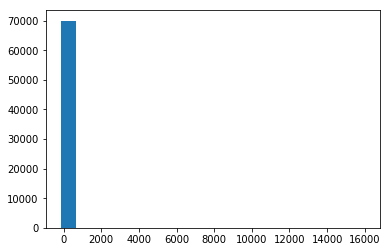

In [6]:
plt.hist(data['ap_hi'], bins = 20)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

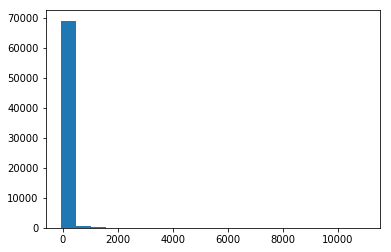

In [7]:
plt.hist(data['ap_lo'], bins = 20)
plt.show

## Cleaning & Preparation

In [8]:
from scipy.stats import zscore

data['ap_zscore'] = zscore(data['ap_hi'])
data['is_outlier'] = data['ap_zscore'].apply(
  lambda x: x <= -0.5 or x >= 1
)
data[data['is_outlier']]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,ap_zscore,is_outlier
567,815,21281,1,168,78.0,14,90,2,1,0,0,1,1,-0.745517,True
927,1294,21867,2,175,70.0,14,90,3,1,0,0,1,1,-0.745517,True
979,1360,18225,1,172,65.0,11,80,1,3,0,0,1,0,-0.764996,True
1600,2260,19201,1,165,66.0,12,80,1,1,0,0,1,0,-0.758503,True
1627,2301,22591,1,165,71.0,14,80,1,1,0,0,1,1,-0.745517,True
1772,2505,14365,2,168,64.0,11,60,1,1,1,1,1,0,-0.764996,True
1876,2654,15116,1,160,60.0,902,60,1,1,0,0,1,0,5.020331,True
2014,2845,22712,2,167,59.0,906,0,1,1,0,0,1,0,5.046303,True
2167,3057,21945,2,169,75.0,14,80,2,1,0,0,1,1,-0.745517,True
2203,3112,21776,2,187,80.0,12,80,1,1,1,0,1,0,-0.758503,True


In [9]:
data['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [10]:
indexNames = data[ data['is_outlier'] == True ].index
 
data.drop(indexNames , inplace=True)

In [11]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,ap_zscore
count,69772.000000,69772.000000,69772.000000,69772.000000,69772.000000,69772.000000,69772.000000,69772.000000,69772.000000,69772.000000,69772.000000,69772.000000,69772.000000,69772.000000
mean,49973.417216,19469.414579,1.349596,164.359514,74.211350,127.001820,96.641948,1.367182,1.226581,0.088288,0.053818,0.803789,0.499627,-0.011788
std,28849.353697,2467.002754,0.476846,8.199407,14.399486,17.096568,188.575256,0.680591,0.572389,0.283715,0.225660,0.397132,0.500003,0.111009
min,0.000000,10798.000000,1.000000,55.000000,10.000000,60.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.446836
25%,25002.750000,17665.750000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,-0.057251
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,-0.057251
75%,74886.750000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.072610
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,240.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.721917


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69772 entries, 0 to 69999
Data columns (total 15 columns):
id             69772 non-null int64
age            69772 non-null int64
gender         69772 non-null int64
height         69772 non-null int64
weight         69772 non-null float64
ap_hi          69772 non-null int64
ap_lo          69772 non-null int64
cholesterol    69772 non-null int64
gluc           69772 non-null int64
smoke          69772 non-null int64
alco           69772 non-null int64
active         69772 non-null int64
cardio         69772 non-null int64
ap_zscore      69772 non-null float64
is_outlier     69772 non-null bool
dtypes: bool(1), float64(2), int64(12)
memory usage: 8.1 MB


In [13]:
data = data.drop(['ap_zscore', 'is_outlier'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69772 entries, 0 to 69999
Data columns (total 13 columns):
id             69772 non-null int64
age            69772 non-null int64
gender         69772 non-null int64
height         69772 non-null int64
weight         69772 non-null float64
ap_hi          69772 non-null int64
ap_lo          69772 non-null int64
cholesterol    69772 non-null int64
gluc           69772 non-null int64
smoke          69772 non-null int64
alco           69772 non-null int64
active         69772 non-null int64
cardio         69772 non-null int64
dtypes: float64(1), int64(12)
memory usage: 7.5 MB


In [14]:
from scipy.stats import zscore

data['ap_zscore'] = zscore(data['ap_lo'])
data['is_outlier'] = data['ap_zscore'].apply(
  lambda x: x <= -0.5 or x >= 1.5
)
data[data['is_outlier']]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,ap_zscore,is_outlier
228,314,17489,2,183,98.0,160,1100,1,2,1,0,1,1,5.320768,True
241,334,21932,2,157,60.0,160,1000,2,1,0,0,0,1,4.790472,True
260,357,18217,1,150,83.0,140,800,1,1,0,0,1,1,3.729880,True
329,458,23407,1,176,63.0,160,1000,2,2,0,0,0,1,4.790472,True
345,482,18704,1,154,81.0,140,1000,2,1,0,0,1,1,4.790472,True
473,680,15226,1,150,95.0,150,1033,1,1,0,0,1,1,4.965470,True
559,805,20430,2,173,101.0,200,1000,1,1,0,0,1,1,4.790472,True
613,886,18963,1,165,92.0,140,1000,1,1,1,0,1,1,4.790472,True
649,928,18190,1,166,57.0,190,1100,1,1,0,0,1,1,5.320768,True
653,932,21842,1,156,72.0,180,1000,2,1,0,0,0,1,4.790472,True


In [15]:
data['cardio'].value_counts()

0    34912
1    34860
Name: cardio, dtype: int64

In [16]:
indexNames = data[ data['is_outlier'] == True ].index
 
data.drop(indexNames , inplace=True)

In [17]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,ap_zscore
count,68809.000000,68809.000000,68809.000000,68809.000000,68809.000000,68809.000000,68809.000000,68809.000000,68809.000000,68809.000000,68809.000000,68809.000000,68809.000000,68809.000000
mean,49970.099638,19464.127469,1.348704,164.360433,74.121401,126.613873,81.350347,1.364691,1.225930,0.087968,0.053627,0.803412,0.494892,-0.081091
std,28844.620278,2468.100889,0.476564,8.192423,14.331790,16.766945,9.780528,0.678969,0.571883,0.283251,0.225281,0.397421,0.499978,0.051866
min,0.000000,10798.000000,1.000000,55.000000,11.000000,60.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.480671
25%,24997.000000,17657.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,-0.088252
50%,50010.000000,19701.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,-0.088252
75%,74859.000000,21324.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,-0.035222
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.495074


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68809 entries, 0 to 69999
Data columns (total 15 columns):
id             68809 non-null int64
age            68809 non-null int64
gender         68809 non-null int64
height         68809 non-null int64
weight         68809 non-null float64
ap_hi          68809 non-null int64
ap_lo          68809 non-null int64
cholesterol    68809 non-null int64
gluc           68809 non-null int64
smoke          68809 non-null int64
alco           68809 non-null int64
active         68809 non-null int64
cardio         68809 non-null int64
ap_zscore      68809 non-null float64
is_outlier     68809 non-null bool
dtypes: bool(1), float64(2), int64(12)
memory usage: 7.9 MB


In [19]:
data = data.drop(['ap_zscore', 'is_outlier'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68809 entries, 0 to 69999
Data columns (total 13 columns):
id             68809 non-null int64
age            68809 non-null int64
gender         68809 non-null int64
height         68809 non-null int64
weight         68809 non-null float64
ap_hi          68809 non-null int64
ap_lo          68809 non-null int64
cholesterol    68809 non-null int64
gluc           68809 non-null int64
smoke          68809 non-null int64
alco           68809 non-null int64
active         68809 non-null int64
cardio         68809 non-null int64
dtypes: float64(1), int64(12)
memory usage: 7.3 MB


In [20]:
data = data.drop('id', axis = 1)

data['age'] = data['age']/365
data['age'] = data['age'].round(0)
data['age'] = data['age'].astype('int64')

data['gender'] = data['gender'].map({1: 0, 2: 1})
#o: woman 1:man

data['BMI'] = (data['weight']/((data['height'])**2))*10000
data['BMI'] = data['BMI'].round(1)

data['overweight'] = np.where(data['BMI'] > 25.0, 1, 0)

data['high_pressure'] = np.where(data['ap_hi'] > 139, 1, 0)

In [21]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight,high_pressure
0,50,1,168,62.0,110,80,1,1,0,0,1,0,22.0,0,0
1,55,0,156,85.0,140,90,3,1,0,0,1,1,34.9,1,1
2,52,0,165,64.0,130,70,3,1,0,0,0,1,23.5,0,0
3,48,1,169,82.0,150,100,1,1,0,0,1,1,28.7,1,1
4,48,0,156,56.0,100,60,1,1,0,0,0,0,23.0,0,0


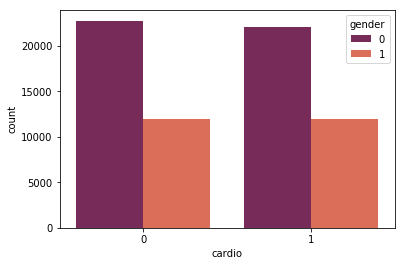

In [22]:
sns.countplot(x=data['cardio'],data=data, hue=data['gender'],palette='rocket')

In [23]:
data['cardio'].value_counts()

0    34756
1    34053
Name: cardio, dtype: int64

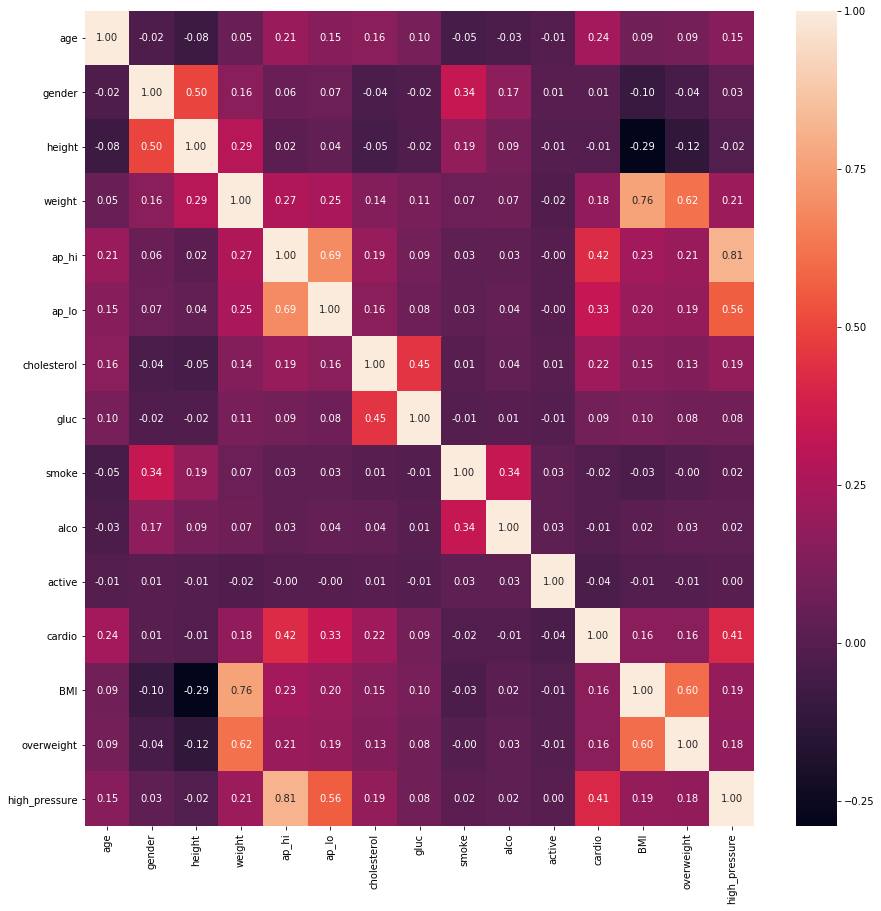

In [24]:
corr_data = data.corr()

plt.figure(figsize=(15,15))
sns.heatmap(corr_data, annot=True, fmt = ".2f")
plt.show()

In [25]:
X = data.drop('cardio', axis = 1)
y = data['cardio']

In [26]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI,overweight,high_pressure
25779,52,0,165,60.0,120,80,1,1,0,0,1,22.0,0,0
15500,48,0,156,57.0,110,70,2,1,0,0,1,23.4,0,0
68176,60,0,159,74.0,110,70,1,1,0,0,1,29.3,1,0
32838,55,0,158,79.0,100,70,2,2,0,0,1,31.6,1,0
59253,46,0,163,83.0,150,90,1,1,0,0,1,31.2,1,1


## Decision Tree

In [36]:
from sklearn import tree

dt = tree.DecisionTreeClassifier(class_weight = 'balanced', criterion = 'gini', 
                                 max_depth=10, min_samples_leaf=12,min_samples_split=10)
dt.fit(X_train, y_train)

# {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 12, 'min_samples_split': 10}

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=12, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [37]:
from sklearn import metrics

accuracy_dt = dt.score(X_test, y_test)
predicted_dt = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)
auc_dt = metrics.roc_auc_score(y_test.values, predicted_dt)

print('DT accuracy: {}, AUC: {}'.format(accuracy_dt, auc_dt))

DT accuracy: 0.7276558639732597, AUC: 0.7275382986720895


Accuracy:  0.7276558639732597
              precision    recall  f1-score   support

           0       0.72      0.74      0.73     10394
           1       0.73      0.71      0.72     10249

   micro avg       0.73      0.73      0.73     20643
   macro avg       0.73      0.73      0.73     20643
weighted avg       0.73      0.73      0.73     20643



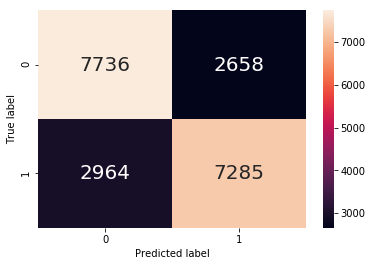

c:\python\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


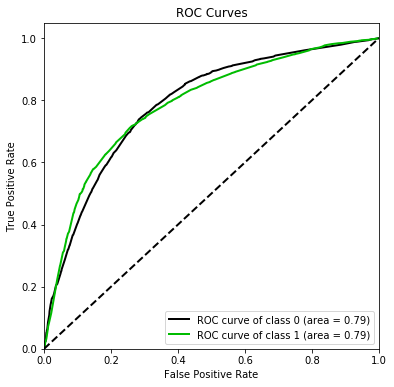

In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scikitplot.metrics import plot_roc_curve

print('Accuracy: ', accuracy_score(y_test, predicted_dt)) 
print(classification_report(y_test, predicted_dt))

sns.heatmap(confusion_matrix(y_test, predicted_dt), fmt='g', annot=True, annot_kws={"size": 20})
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

plot_roc_curve(y_test, y_prob, figsize=(6,6), curves=('each_class'))
plt.show()

In [39]:
import graphviz
dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names=X_train.columns,
                                class_names=['non-alcoholic', 'alcoholic'],
                                filled=True, rounded=True, 
                                special_characters=True, proportion=True)

graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render('dtree_render', view = True)


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.446478 to fit


'dtree_render.png'

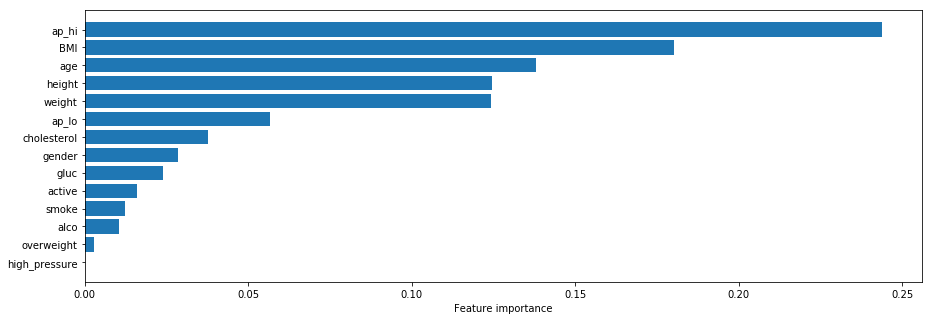

In [31]:
plt.figure(figsize=(15,5))

importances = pd.DataFrame({
    'feature': X.columns,
    'importance': dt.feature_importances_
})
importances = importances.sort_values('importance')

plt.barh(importances.feature, importances.importance)
plt.xlabel('Feature importance')
plt.show()

## DT GridSearch - Accuracy

In [64]:
from sklearn.model_selection import GridSearchCV


param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [2,3,5,10,12,15],
              'min_samples_split': [2,3,5,10],
              'min_samples_leaf': [5,10,12,15,18, 20],
              'class_weight': [None, 'balanced']
             }

dt = tree.DecisionTreeClassifier()
grid_search = GridSearchCV(
    estimator = dt, 
    param_grid = param_grid, 
    scoring ='accuracy',
    n_jobs = -1,
    verbose = 1,
    refit=True
)

grid_search = grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

print(best_params)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1728 out of 1728 | elapsed:  4.4min finished


{'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 2}


In [65]:
from sklearn import metrics

accuracy_dto = grid_search.score(X_test, y_test)
predicted_dto = grid_search.predict(X_test)
y_prob_dto = grid_search.predict_proba(X_test)
auc_dto = metrics.roc_auc_score(y_test.values, predicted_dto)

print('DT accuracy: {}, AUC: {}'.format(accuracy_dto, auc_dto))

DT accuracy: 0.7297388945405222, AUC: 0.7290106190379467


Accuracy:  0.7297388945405222
              precision    recall  f1-score   support

           0       0.69      0.83      0.76     10394
           1       0.79      0.63      0.70     10249

   micro avg       0.73      0.73      0.73     20643
   macro avg       0.74      0.73      0.73     20643
weighted avg       0.74      0.73      0.73     20643



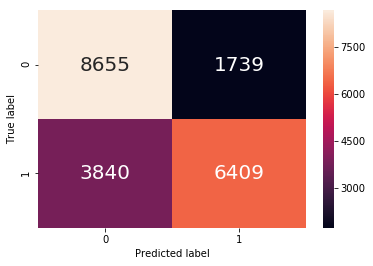

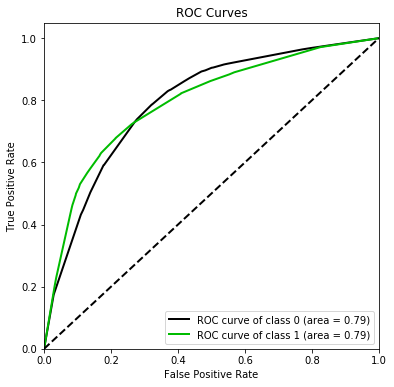

In [66]:
print('Accuracy: ', accuracy_score(y_test, predicted_dto)) 
print(classification_report(y_test, predicted_dto))

sns.heatmap(confusion_matrix(y_test, predicted_dto), fmt='g', annot=True, annot_kws={"size": 20})
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

plot_roc_curve(y_test, y_prob_dto, figsize=(6,6), curves=('each_class'))
plt.show()

## DT GridSearch - Recall

In [67]:
from sklearn.model_selection import GridSearchCV


param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [2,3,5,10,12,15],
              'min_samples_split': [2,3,5,10],
              'min_samples_leaf': [5,10,12,15,18, 20],
              'class_weight': [None, 'balanced']
             }

dt = tree.DecisionTreeClassifier()
grid_search_dt = GridSearchCV(
    estimator = dt, 
    param_grid = param_grid, 
    scoring ='recall',
    n_jobs = -1,
    verbose = 1,
    refit=True
)

grid_search_dt = grid_search_dt.fit(X_train, y_train)
best_params = grid_search_dt.best_params_

print(best_params)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1728 out of 1728 | elapsed:  5.2min finished


{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 12, 'min_samples_split': 10}


In [68]:
from sklearn import metrics

accuracy_dto = grid_search_dt.score(X_test, y_test)
predicted_dto = grid_search_dt.predict(X_test)
y_prob_dto_rec = grid_search_dt.predict_proba(X_test)
auc_dto = metrics.roc_auc_score(y_test.values, predicted_dto)

print('DT accuracy: {}, AUC: {}'.format(accuracy_dto, auc_dto))

DT accuracy: 0.7110937652453898, AUC: 0.7276365497383385


Accuracy:  0.727752749115923
              precision    recall  f1-score   support

           0       0.72      0.74      0.73     10394
           1       0.73      0.71      0.72     10249

   micro avg       0.73      0.73      0.73     20643
   macro avg       0.73      0.73      0.73     20643
weighted avg       0.73      0.73      0.73     20643



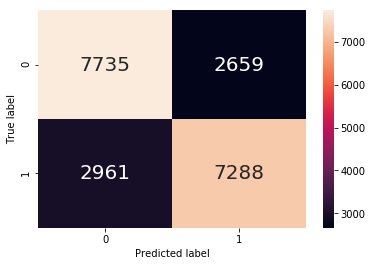

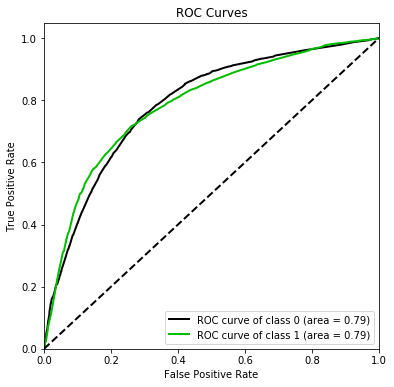

In [69]:
print('Accuracy: ', accuracy_score(y_test, predicted_dto)) 
print(classification_report(y_test, predicted_dto))

sns.heatmap(confusion_matrix(y_test, predicted_dto), fmt='g', annot=True, annot_kws={"size": 20})
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

plot_roc_curve(y_test, y_prob_dto_rec, figsize=(6,6), curves=('each_class'))
plt.show()

## Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 500, random_state = 1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [33]:
from sklearn import metrics

accuracy_rf = rf.score(X_test, y_test)
predicted_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)
auc_rf = metrics.roc_auc_score(y_test.values, predicted_rf)

print('RF accuracy: {}, AUC: {}'.format(accuracy_rf, auc_rf))

RF accuracy: 0.711088504577823, AUC: 0.7110061921123425


Accuracy:  0.711088504577823
              precision    recall  f1-score   support

           0       0.71      0.72      0.72     10394
           1       0.71      0.70      0.71     10249

   micro avg       0.71      0.71      0.71     20643
   macro avg       0.71      0.71      0.71     20643
weighted avg       0.71      0.71      0.71     20643



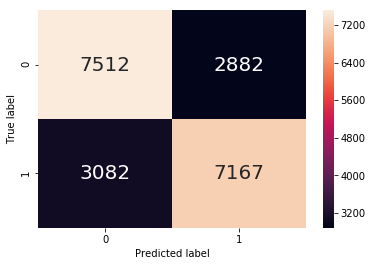

c:\python\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


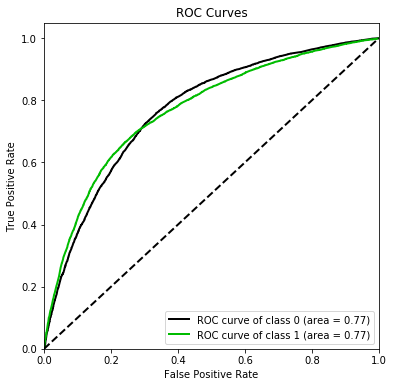

In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('Accuracy: ', accuracy_score(y_test, predicted_rf)) 
print(classification_report(y_test, predicted_rf))

sns.heatmap(confusion_matrix(y_test, predicted_rf), fmt='g', annot=True, annot_kws={"size": 20})
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

plot_roc_curve(y_test, y_prob_rf, figsize=(6,6), curves=('each_class'))
plt.show()

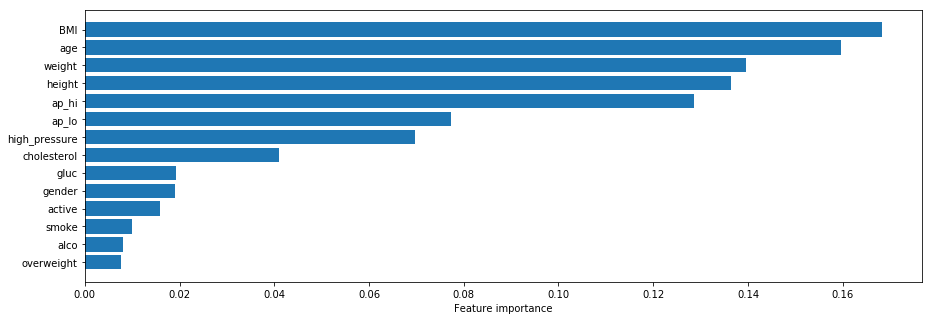

In [35]:
plt.figure(figsize=(15,5))

importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
})
importances = importances.sort_values('importance')

plt.barh(importances.feature, importances.importance)
plt.xlabel('Feature importance')
plt.show()

## RF GridSearch 

In [144]:
from sklearn.model_selection import GridSearchCV

parameters = {
    "criterion": ["gini", "entropy"],
    "max_depth": [4,5,6,7,8],
    "max_features": ['auto','sqrt','log2'],
    "min_samples_split": [2,7,10,13],
    "min_samples_leaf": [2,7,10,13],
    "n_estimators": [100,200,500]
}

rf = RandomForestClassifier()
rf_optimized = GridSearchCV(estimator=rf, param_grid=parameters, n_jobs=-1,
                               refit=True, verbose=True, cv=3, scoring = 'recall')

rf_optimized.fit(X_train, y_train)

Fitting 3 folds for each of 1440 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 32.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 61.0min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 102.0min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 158.4min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 220.0min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 282.5min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 367.2min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed: 397.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 5, 6, 7, 8], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': [2, 7, 10, 13], 'min_samples_leaf': [2, 7, 10, 13], 'n_estimators': [100, 200, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=True)

In [145]:
from sklearn import metrics


accuracy_rfo = rf_optimized.score(X_test, y_test)
predicted_rfo = rf_optimized.predict(X_test)
y_prob_rfo_gs = rf_optimized.predict_proba(X_test)
auc_lro = metrics.roc_auc_score(y_test.values, predicted_rfo)

print('Best score: {}, best params: {}'.format(rf_optimized.best_score_, rf_optimized.best_params_))
print('Random forest accuracy: {}, AUC: {}'.format(accuracy_rfo, auc_lro))

Best score: 0.6506049418244432, best params: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Random forest accuracy: 0.6489413601326959, AUC: 0.7322059119308852


Accuracy:  0.7327907765344185
              precision    recall  f1-score   support

           0       0.70      0.82      0.75     10394
           1       0.78      0.65      0.71     10249

   micro avg       0.73      0.73      0.73     20643
   macro avg       0.74      0.73      0.73     20643
weighted avg       0.74      0.73      0.73     20643



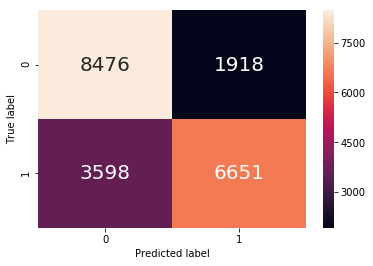

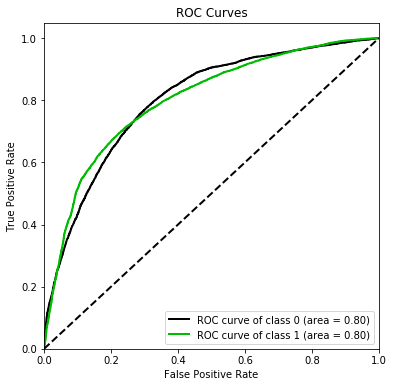

In [146]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('Accuracy: ', accuracy_score(y_test, predicted_rfo)) 
print(classification_report(y_test, predicted_rfo))

sns.heatmap(confusion_matrix(y_test, predicted_rfo), fmt='g', annot=True, annot_kws={"size": 20})
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

plot_roc_curve(y_test, y_prob_rfo_gs, figsize=(6,6), curves=('each_class'))
plt.show()

## Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [37]:
from sklearn import metrics


accuracy_lr = logreg.score(X_test, y_test)
predicted_lr = logreg.predict(X_test)
auc_lr = metrics.roc_auc_score(y_test.values, predicted_lr)

print('Logistic regression accuracy: {}, AUC: {}'.format(accuracy_lr, auc_lr))

Logistic regression accuracy: 0.7273652085452695, AUC: 0.7266868379317661


Accuracy:  0.7273652085452695
              precision    recall  f1-score   support

           0       0.69      0.82      0.75     10394
           1       0.78      0.63      0.70     10249

   micro avg       0.73      0.73      0.73     20643
   macro avg       0.74      0.73      0.72     20643
weighted avg       0.74      0.73      0.72     20643



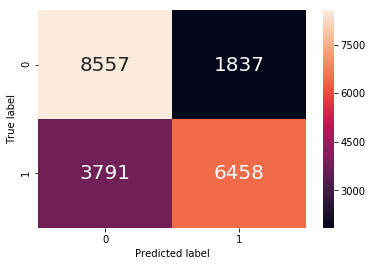

In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('Accuracy: ', accuracy_score(y_test, predicted_lr)) 
print(classification_report(y_test, predicted_lr))

sns.heatmap(confusion_matrix(y_test, predicted_lr), fmt='g', annot=True, annot_kws={"size": 20})
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Logistic Regression Standardized

In [40]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

In [41]:
from sklearn.model_selection import GridSearchCV


parameters = {
    'penalty': ('l1', 'l2'),
    'C': (1.0, 0.75, 0.5, 0.25, 0.1, 1.25, 1.5),
    'fit_intercept': (True, False) 
}

logreg = LogisticRegression(n_jobs=-1)
logreg_optimized_std = GridSearchCV(estimator=logreg, param_grid=parameters, n_jobs=-1,
                               refit=True, verbose=True, cv=5, scoring = 'recall')
logreg_optimized_std.fit(X_train_std, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   50.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l2', random_state=None, solver='warn', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'penalty': ('l1', 'l2'), 'C': (1.0, 0.75, 0.5, 0.25, 0.1, 1.25, 1.5), 'fit_intercept': (True, False)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=True)

In [42]:
from sklearn import metrics


accuracy_lro_std = logreg_optimized_std.score(X_test_std, y_test)
predicted_lro_std = logreg_optimized_std.predict(X_test_std)
auc_lro_std = metrics.roc_auc_score(y_test.values, predicted_lro_std)

print('Best score: {}, best params: {}'.format(logreg_optimized_std.best_score_, logreg_optimized_std.best_params_))
print('Logistic regression accuracy: {}, AUC: {}'.format(accuracy_lro_std, auc_lro_std))

Best score: 0.6315742846217953, best params: {'C': 1.0, 'fit_intercept': True, 'penalty': 'l2'}
Logistic regression accuracy: 0.6330373694994633, AUC: 0.7276212439184828


Accuracy:  0.7282856174005716
              precision    recall  f1-score   support

           0       0.69      0.82      0.75     10394
           1       0.78      0.63      0.70     10249

   micro avg       0.73      0.73      0.73     20643
   macro avg       0.74      0.73      0.73     20643
weighted avg       0.74      0.73      0.73     20643



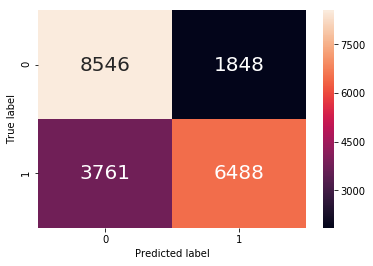

In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('Accuracy: ', accuracy_score(y_test, predicted_lro_std,normalize=True)) 
print(classification_report(y_test, predicted_lro_std))

sns.heatmap(confusion_matrix(y_test, predicted_lro_std), fmt='g', annot=True, annot_kws={"size": 20})
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()